In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dataset=pd.read_csv('parkinsons_updrs.data.csv')

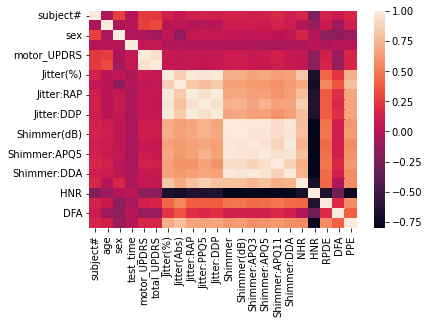

In [17]:
sns.heatmap(dataset.corr( ), annot=False)

In [18]:
print(dataset.columns[18])
# dataset = dataset.drop(dataset.columns[18], axis=1)
# dataset = dataset.drop(dataset.columns[4], axis=1)

HNR


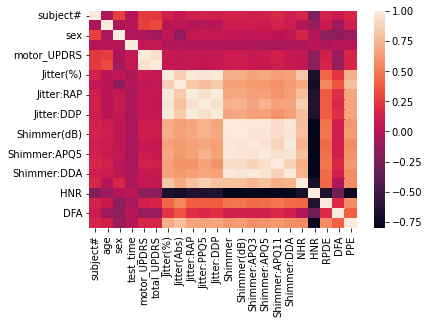

In [19]:
sns.heatmap(dataset.corr( ), annot=False)

In [20]:
dataset = dataset.drop('subject#', axis=1) # Remove Subject Num
dataset = dataset.drop('motor_UPDRS', axis=1) # Remove Motor_UPDRS
# dataset = dataset.drop("Jitter(%)", axis=1) # Remove Jitter(%)

In [21]:
y=dataset['total_UPDRS']
X=dataset.loc[:,dataset.columns!="total_UPDRS"]

In [22]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [23]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf',gamma=0.09, C=1.5)

In [10]:
svr.fit(x_train,y_train)

SVR(C=1.5, gamma=0.09)

In [24]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(x_train)
# x_train = sc.transform(x_train)
# x_test = sc.transform(x_test)

In [25]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = svr.predict(x_train)
y_pred_test = svr.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training Accuracy for Multiple Linear Regression Model:  0.38511887284284374
Testing Accuracy for Multiple Linear Regression Model:  0.2400217311307805
RMSE for Training Data:  8.417395985595675
RMSE for Testing Data:  9.203821446094597


NotFittedError: ignored

In [ ]:
true_val = y_train
pred_val = y_pred_train

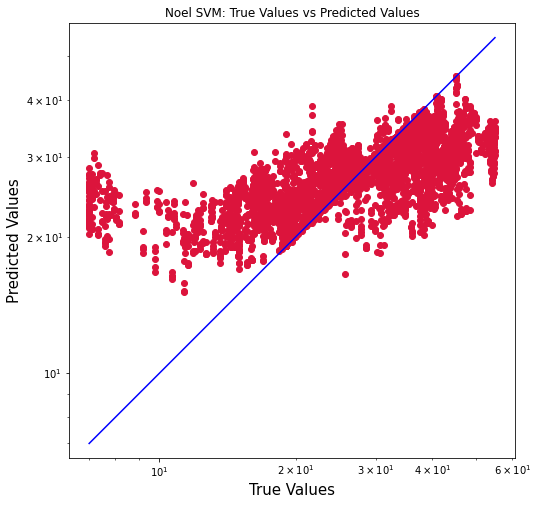

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Noel SVM: True Values vs Predicted Values")
plt.axis('equal')
plt.show()